In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.mixture import GaussianMixture


In [2]:
path_citrus = 'dataset/citrus.csv'
citrus = pd.read_csv(path_citrus)
citrus.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [3]:
path_iris = 'dataset\Iris.csv'
iris = pd.read_csv(path_iris)
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
scaler = StandardScaler()
le = LabelEncoder()

citrus_processed = citrus.copy()

colors = ['red', 'green', 'blue']
numerical = ['diameter', 'weight']
target_citrus = 'name'

names = pd.unique(citrus[target_citrus])

citrus_processed[colors] /= 255
citrus_processed[numerical] = scaler.fit_transform(citrus[numerical])
citrus_processed[target_citrus] = le.fit_transform(citrus[target_citrus])

print(names)
citrus_processed.head()

['orange' 'grapefruit']


,name,diameter,weight,red,green,blue
0,1,-3.601950,-3.022554,0.674510,0.333333,0.007843
1,1,-3.114207,-2.978392,0.650980,0.305882,0.011765
2,1,-2.852366,-2.734645,0.611765,0.317647,0.007843
3,1,-2.826695,-2.719925,0.639216,0.317647,0.015686
4,1,-2.821561,-2.714447,0.631373,0.282353,0.035294


In [5]:
iris_processed = iris.copy()
categorical = ['Species']
numerical = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
target_iris = 'Species'
for feature in categorical:
    iris_processed[feature] = le.fit_transform(iris_processed[feature])

iris_processed[numerical] = scaler.fit_transform(iris_processed[numerical])
iris_processed.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,-0.900681,1.032057,-1.341272,-1.312977,0
1,2,-1.143017,-0.124958,-1.341272,-1.312977,0
2,3,-1.385353,0.337848,-1.398138,-1.312977,0
3,4,-1.506521,0.106445,-1.284407,-1.312977,0
4,5,-1.021849,1.263460,-1.341272,-1.312977,0


In [6]:
X_citrus = citrus_processed.drop(columns=target_citrus)
y_citrus = citrus_processed[target_citrus]

X_iris = iris_processed.drop(columns=[target_iris,'Id'])
y_iris = iris_processed[target_iris]

In [7]:
import em_clustering as em
import visualization as show
import time
def show_results(X, y, K):
    start_time = time.time()
    pis, mus, covs, log_likelihoods = em.em_algorithm(X, K=K, max_iter=100)
    gamma = em.e_step(X, pis, mus, covs)
    cluster_assignments = np.argmax(gamma, axis=1)
    custom_time = time.time() - start_time

    # print("Оценённые априорные вероятности (веса кластеров) pi_k:\n", pis)
    # print("Оценённые средние (центры кластеров) mu_k:\n", mus)
    # print("Оценённые ковариационные матрицы (cov_k):")
    # for k in range(K):
    #     print(f"Кластер {k}:\n", covs[k])

    # print("Принадлежность точек к кластерам (argmax по gamma):\n", cluster_assignments)

    intra_dist, inter_dist = em.compute_cluster_distances(X, cluster_assignments, mus)
    print("Кастомная модель:")
    print("Среднее внутрикластерное расстояние:", intra_dist)
    print("Среднее межкластерное расстояние:", inter_dist)
    print(f'Кастомная модель, время выполнения: {custom_time:.4f} сек')
    print('-'*30)

    ref = GaussianMixture(n_components=3)
    start_time = time.time()
    lbl_ref = ref.fit_predict(X, y)
    ref_time = time.time() - start_time
    centers = ref.means_
    intra_ref, inter_ref = em.compute_cluster_distances(X, lbl_ref, centers)

    print('Эталонная модель:')
    print("Среднее внутрикластерное расстояние:", intra_ref)
    print("Среднее межкластерное расстояние:", inter_ref)
    print(f'Эталонная модель, время выполнения: {ref_time:.4f} сек')

    show.plot_likelihood(log_likelihoods)
    show.plot_least_correlated_pairs(X, gamma, K)
    show.plot_pca_clustering(X, y, gamma, K)
    

In [8]:
X_iris = X_iris.to_numpy()
y_iris = y_iris.to_numpy()

X_citrus = X_citrus.to_numpy()
y_citrus = y_citrus.to_numpy()

Converged on iteration 24
Кастомная модель:
Среднее внутрикластерное расстояние: 1.3202388403795051
Среднее межкластерное расстояние: 2.704524982507529
Кастомная модель, время выполнения: 1.0763 сек
------------------------------
Эталонная модель:
Среднее внутрикластерное расстояние: 1.3202388403795051
Среднее межкластерное расстояние: 2.7072362703371873
Эталонная модель, время выполнения: 0.0913 сек


c:\Users\Loassar\Documents\University\semester_1\ML_algo\fall-24\fall-24\students\rt-akhmarov\lab_1\visualization.py:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[idx].scatter(cluster_points[:, i], cluster_points[:, j], label=f"Cluster {cluster}", c=colors[cluster])


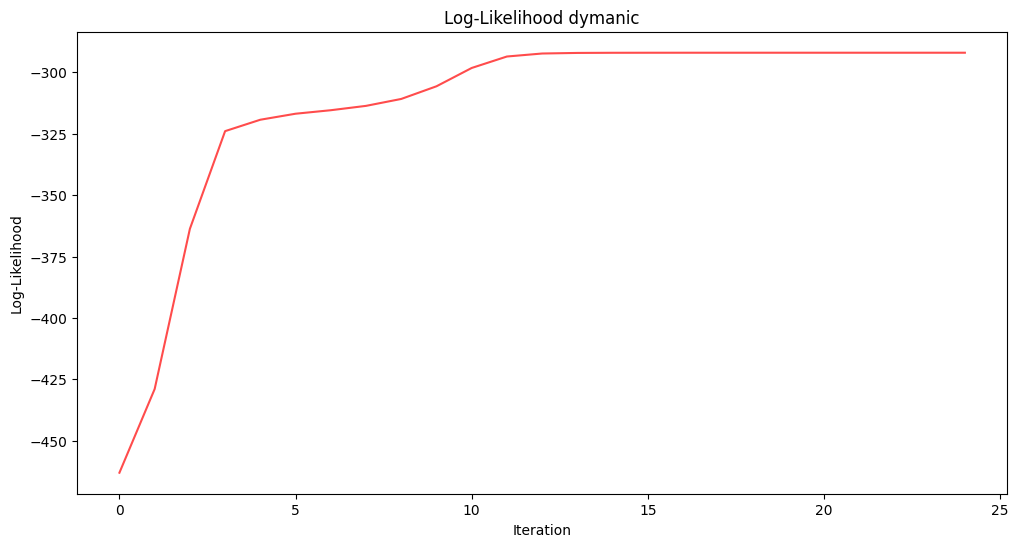

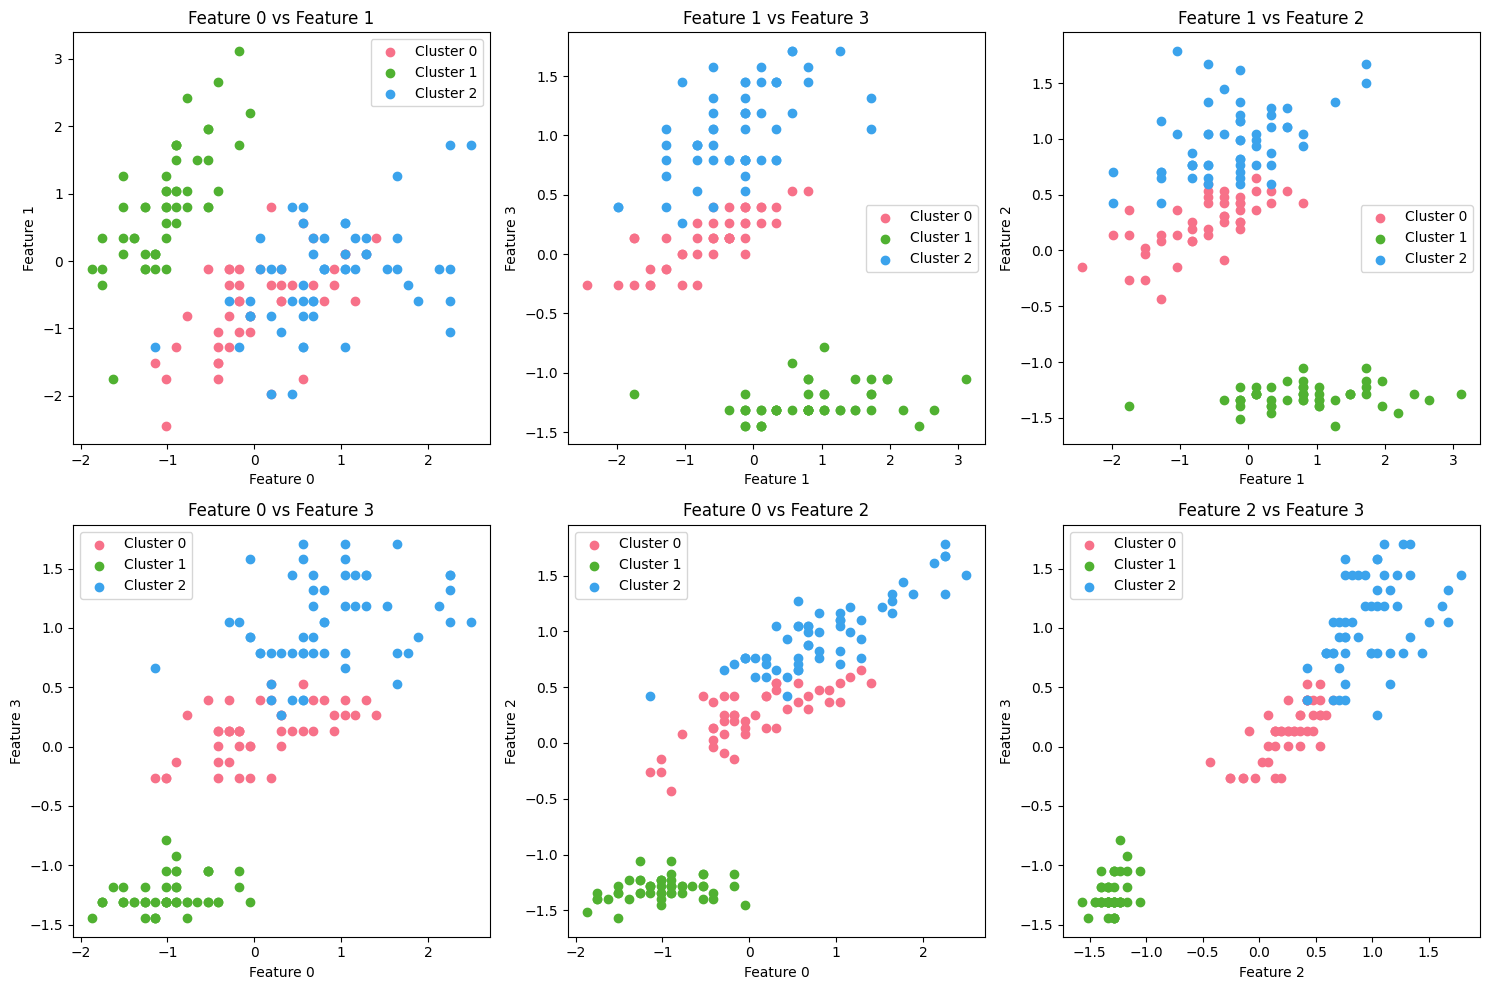

c:\Users\Loassar\Documents\University\semester_1\ML_algo\fall-24\fall-24\students\rt-akhmarov\lab_1\visualization.py:54: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}", c=colors[cluster])


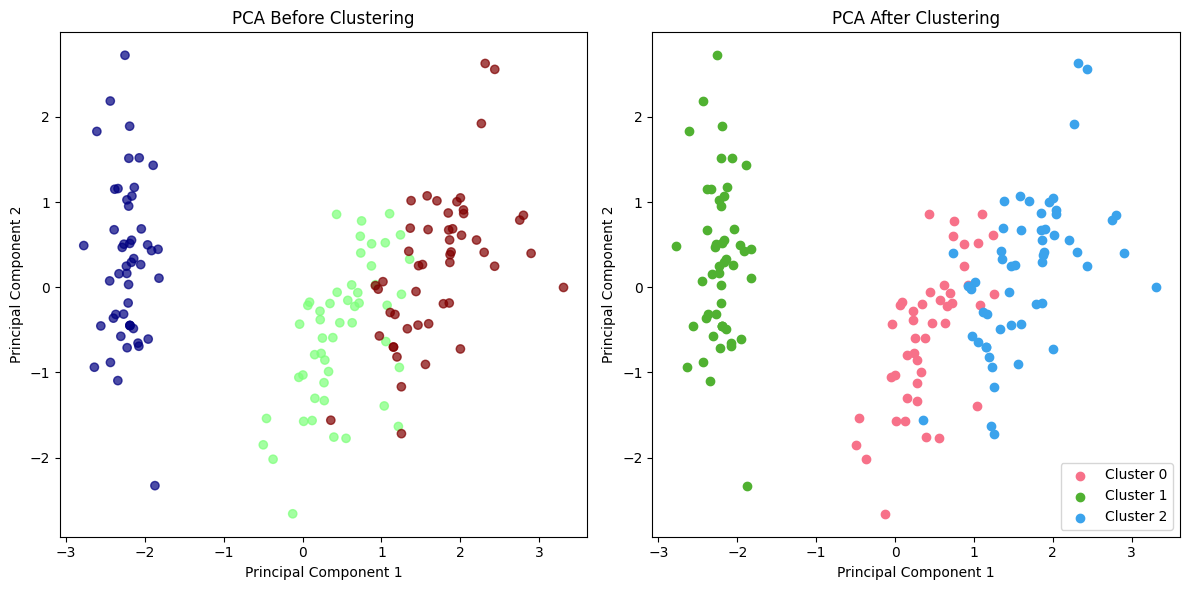

In [9]:
show_results(X_iris, y_iris, K=3)

Converged on iteration 30
Кастомная модель:
Среднее внутрикластерное расстояние: 0.9932680564183605
Среднее межкластерное расстояние: 2.1776426691508455
Кастомная модель, время выполнения: 64.9398 сек
------------------------------
Эталонная модель:
Среднее внутрикластерное расстояние: 1.2542494425268365
Среднее межкластерное расстояние: 1.4944154144598532
Эталонная модель, время выполнения: 0.1213 сек


c:\Users\Loassar\Documents\University\semester_1\ML_algo\fall-24\fall-24\students\rt-akhmarov\lab_1\visualization.py:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[idx].scatter(cluster_points[:, i], cluster_points[:, j], label=f"Cluster {cluster}", c=colors[cluster])


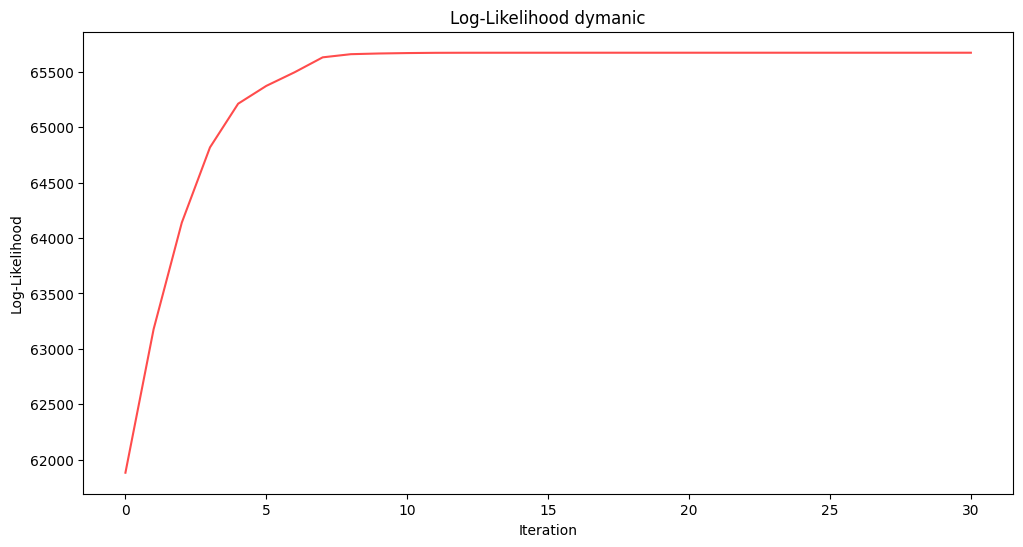

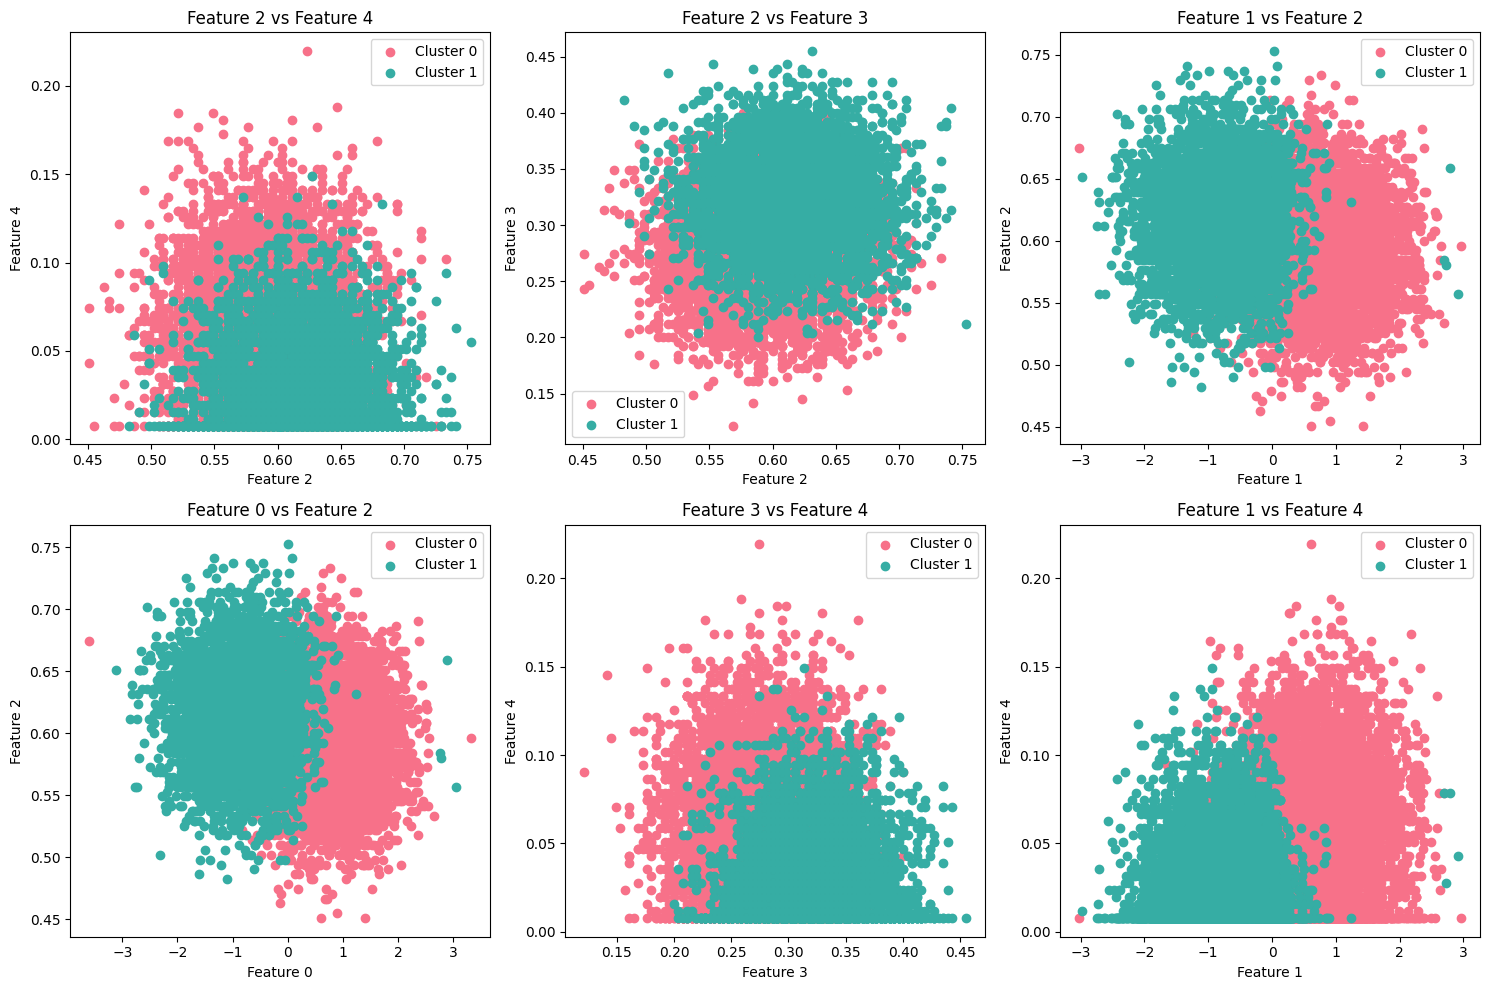

c:\Users\Loassar\Documents\University\semester_1\ML_algo\fall-24\fall-24\students\rt-akhmarov\lab_1\visualization.py:54: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}", c=colors[cluster])


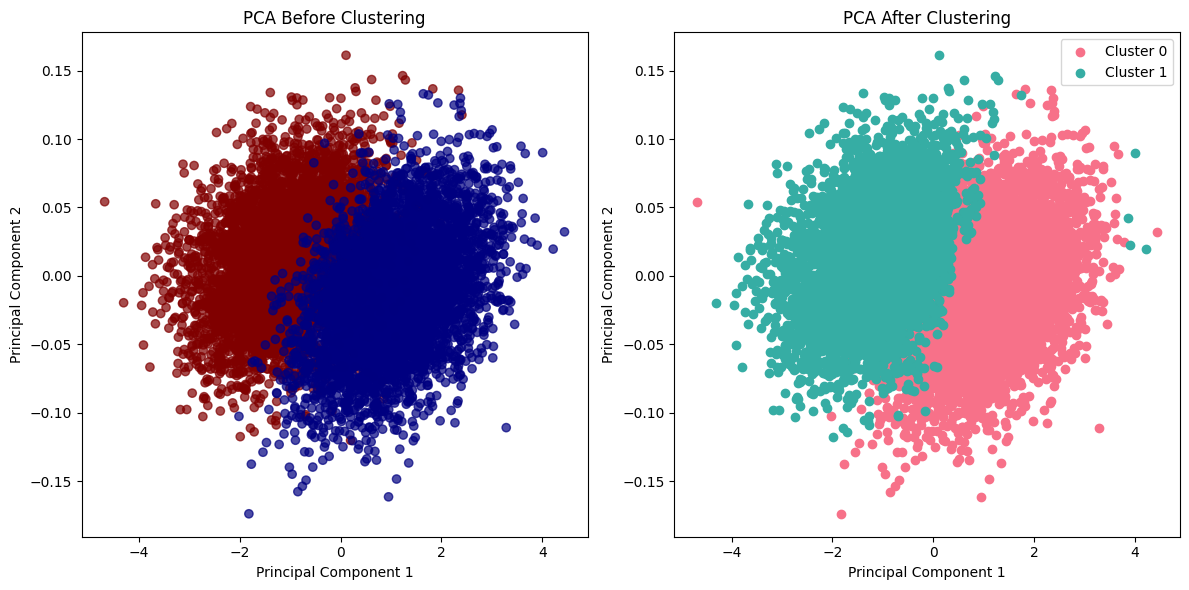

In [10]:
show_results(X_citrus, y_citrus, K=2)